# Estimativa do relevo do embasamento de uma Bacia 2D simples

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import talwani as tw

## Calculando as coordenadas de observação e o relevo da bacia 2D

### Coodernadas de observação

In [3]:
xp = np.arange(25., 100000.,100)
zp = -100.*np.ones_like(xp)

### Relevo da bacia

In [4]:
xs = np.arange(25., 100000.,100)
depths = (-1e-15*(xs - 50000)**4 + 7000. - 2500*np.exp(-(xs - 70000)**2/(10000**2)))
depths -= depths.min()

### Visualização da bacia

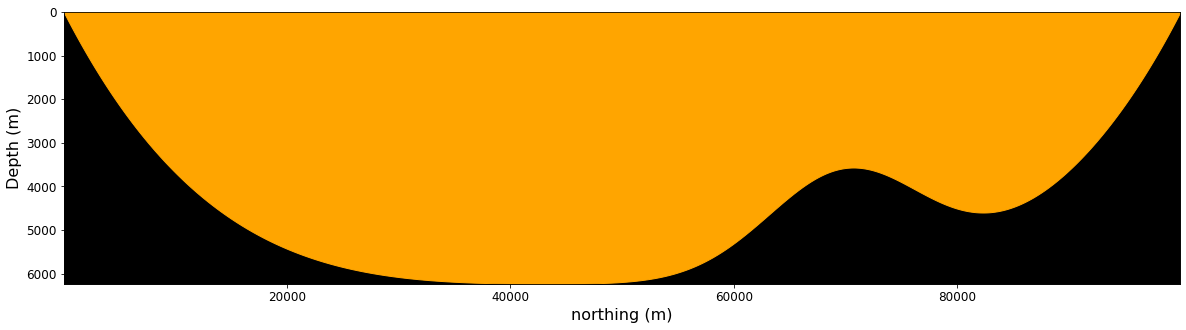

In [5]:
plt.figure(figsize=(20,5))

plt.xlabel('northing (m)', fontsize = 16)
plt.ylabel('Depth (m)', fontsize = 16)
plt.fill_between(xs,depths,max(depths),color='black')
plt.fill_between(xs,depths,color='orange')
plt.xlim(min(xs),max(xs))
plt.ylim(max(depths),min(depths))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

file_name = 'images/basement2D_relief'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Calculando o efeito gravitacional da Bacia 2D 

In [6]:
ref = depths.min()

In [7]:
gravitational = tw.basin(xp,zp,ref,depths,density=-300.)

#### Gerando um ruído aleatório

In [8]:
np.random.seed(seed=40)
std_noise = 0.02*np.max(np.abs(gravitational))

r = np.random.normal(0.0, std_noise, gravitational.size)

print ('%.3f mGal' % std_noise)

1.435 mGal


In [9]:
grav_obs = gravitational + r

### Visualização dos dados observação com ruído Graussiano

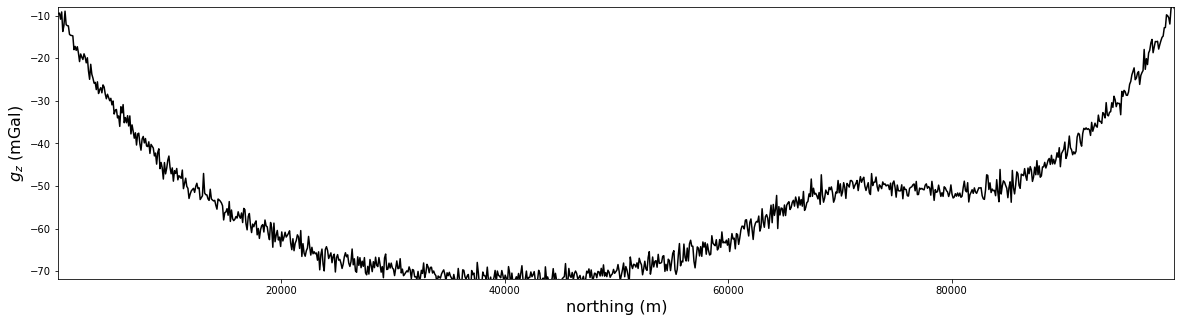

In [10]:
plt.figure(figsize=(20,5))

plt.xlabel('northing (m)', fontsize = 16)
plt.ylabel('$g_z$ (mGal)', fontsize = 16)
plt.plot(xp,grav_obs,'k-')
plt.xlim(xp.min(),xp.max())
plt.ylim(gravitational.min(),gravitational.max())

file_name = 'images/gravity_noise_basin_2D'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Estimando o relevo do embasamento

### Parâmetros para iniciar o processo iterativo da inversão

In [11]:
itmax = 100
eps = 1e-10
mu = 1e-3
rho = -300.
depths_initial = 500.*np.ones_like(depths)

In [12]:
grav_initial = tw.basin(xp,zp,ref,depths_initial,density=rho)

### Visualização do chute inicial

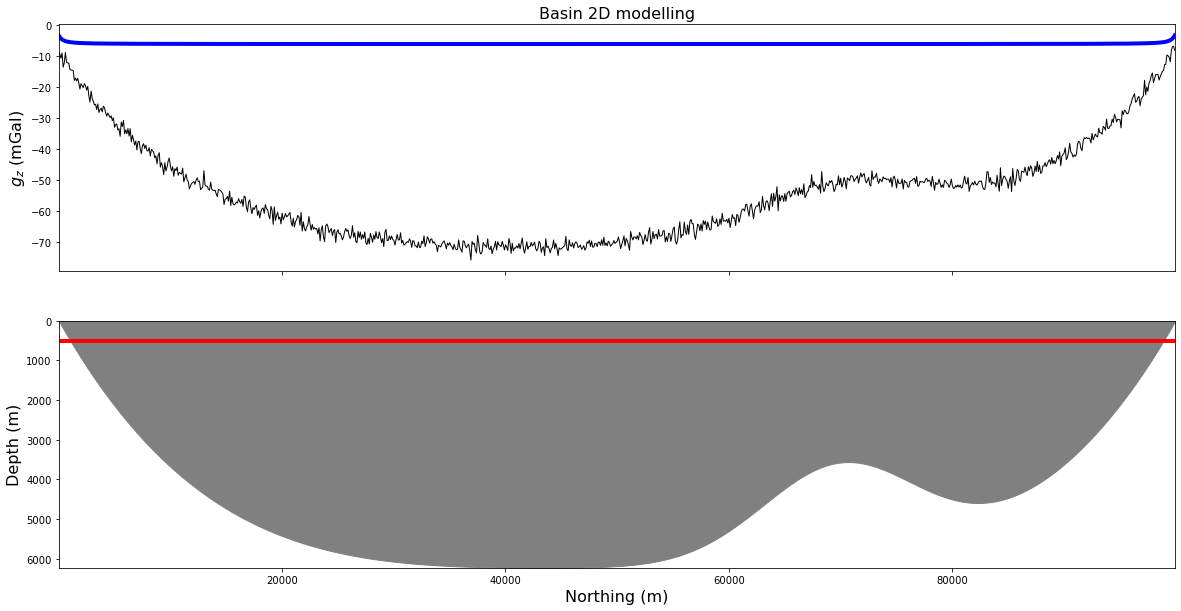

In [13]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(20,10))

## Efeito gravitacional da bacia e os dados preditos iniciais
ax1.set_title('Basin 2D modelling',fontsize=16)
ax1.set_ylabel('$g_z$ (mGal)', fontsize = 16)
ax1.plot(xp,grav_obs,color='black',linewidth=1.)
ax1.plot(xp,grav_initial,color='blue',linewidth=4.)
## Bacia 2D verdadeira e chute inicial 
ax2.set_xlabel('Northing (m)', fontsize = 16)
ax2.set_ylabel('Depth (m)', fontsize = 16)
ax2.fill_between(xs,depths,max(depths),color='white')
ax2.fill_between(xs,depths,color='gray')
ax2.plot(xs,depths_initial,color='red',linewidth=4.)
ax2.set_xlim(min(xs),max(xs))
ax2.set_ylim(max(depths),min(depths))

file_name = 'images/initial_guess_inversion'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

### Visualização e solução do problema inverso

In [14]:
grav_pred, estimated_depths = tw.GN_solver_smoothness(xp,zp,grav_obs,ref,depths_initial,rho,itmax,eps,mu)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


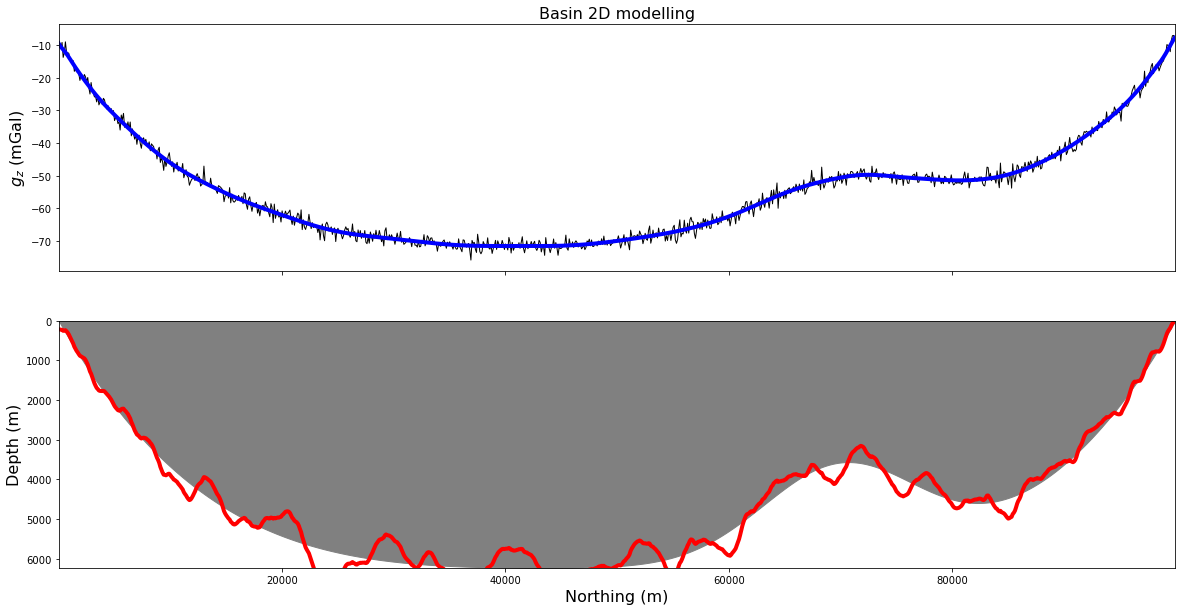

In [15]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(20,10))

## Efeito gravitacional da bacia e os dados preditos
ax1.set_title('Basin 2D modelling',fontsize=16)
ax1.set_ylabel('$g_z$ (mGal)', fontsize = 16)
ax1.plot(xp,grav_obs,color='black',linewidth=1.)
ax1.plot(xp,grav_pred,color='blue',linewidth=4.)
## Bacia 2D verdadeira e estimada 
ax2.set_xlabel('Northing (m)', fontsize = 16)
ax2.set_ylabel('Depth (m)', fontsize = 16)
ax2.fill_between(xs,depths,max(depths),color='white')
ax2.fill_between(xs,depths,color='gray')
ax2.plot(xs,estimated_depths,color='red',linewidth=4.)
ax2.set_xlim(min(xs),max(xs))
ax2.set_ylim(max(depths),min(depths))

file_name = 'images/estimates_basement_relief'
plt.savefig(file_name+'.png',dpi=300)

plt.show()